In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import collections 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df2=df.drop(['age','sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal', 'target'] , 1)
y=df.target
df2

/var/folders/9n/5s_q1tcd4ng0p30nkl_k73j80000gn/T/ipykernel_15669/502529396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df.drop(['age','sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal', 'target'] , 1)


,trestbps,chol,thalach
0,145,233,150
1,130,250,187
2,130,204,172
3,120,236,178
4,120,354,163
...,...,...,...
298,140,241,123
299,110,264,132
300,144,193,141
301,130,131,115


In [11]:
X=df2.values

In [8]:
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

In [9]:
pre_prob(y)


array([0.45544554, 0.54455446])

In [13]:
def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0]
                                                      - n_0) - 1))
    return m, v # mean and variance 

In [26]:
m ,v=mean_var(X , y)

In [40]:
v

array([[ 350.8108008 , 2445.75880673,  510.70496139],
       [ 261.4563932 , 2867.91005174,  367.65284553]])

In [51]:
m

array([[134.39855072, 251.08695652, 139.10144928],
       [129.3030303 , 242.23030303, 158.46666667]])

In [33]:
m.shape[1]

3

In [61]:
def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            product = product * (1/np.sqrt(2*3.14*v[i][j])) * np.exp(-0.5* pow((x[j] - m[i][j]),2)/v[i][j])
    #print(product[0:2])
        #pfc[i] = product
    return product[0:2]

In [62]:
prob_feature_class(m , v , X)

array([8.82893481e-08, 2.64854468e-16])

In [63]:
def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [69]:
pfc = prob_feature_class(m, v, X)
pfc

array([8.82893481e-08, 2.64854468e-16])

In [70]:
pre_probab=pre_prob(y)

In [74]:
pcf = np.ones(2)
total_prob = 0
for i in range(0, 2):
    total_prob = total_prob + (pfc[i] * pre_probab[i])
for i in range(0, 2):
    pcf[i] = (pfc[i] * pre_probab[i])/total_prob
prediction = int(pcf.argmax())

In [76]:
#m, v, pre_probab, pfc, pcf, prediction = GNB(X_train, y_train, X)
print('mean:',m) # Output given below...(mean for 2 classes of all features)
print('var:',v) # Output given below..(variance for 2 classes of features)
print('prior probabilities:',pre_probab) # Output given below.........(prior probabilities)
print('posterior probabilities:',pfc) # Output given below............(posterior probabilities)
print('Conditional Probability of the classes given test-data:',pcf) # Conditional Probability of the classes given test-data
print('final prediction:',prediction) # Output given below............(final prediction)

mean: [[134.39855072 251.08695652 139.10144928]
 [129.3030303  242.23030303 158.46666667]]
var: [[ 350.8108008  2445.75880673  510.70496139]
 [ 261.4563932  2867.91005174  367.65284553]]
prior probabilities: [0.45544554 0.54455446]
posterior probabilities: [8.82893481e-08 2.64854468e-16]
Conditional Probability of the classes given test-data: [9.99999996e-01 3.58677266e-09]
final prediction: 0


In [77]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [79]:
def Confusion_Matrix(y ,y_pred):
    cm = confusion_matrix(y, y_pred)

    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()


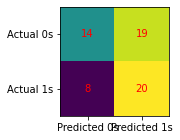

In [80]:
y_pred=clf.predict(X_test)
Confusion_Matrix(y_test , y_pred)

In [83]:
print('precision_score:',precision_score(y_test,  y_pred))
print('recall_scor:',recall_score(y_test, y_pred))
print('f1_score:',f1_score(y_test,  y_pred))


precision_score: 0.5128205128205128
recall_scor: 0.7142857142857143
f1_score: 0.5970149253731343
